In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import patches
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot_2samples
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Chapter 3:
### Problem 3.3

In [4]:
def synthesize_A(N):
    return np.random.normal(loc=0., scale=1., size=N)

def synthesize_B(N):
    x = np.random.normal(loc=0., scale=1., size=N)
    y = np.random.normal(loc=0., scale=1., size=N)
    return x/y

def observe_data(N, loop):
    result_A = np.empty((loop, 3), dtype='float')
    result_B = np.empty((loop, 3), dtype='float')
    for i in range(0, loop):
        A = synthesize_A(N)
        B = synthesize_B(N)
        
        result_A[i, 0], result_A[i, 1], result_A[i, 2] = np.mean(A), np.median(A), (np.min(A) + np.max(A))/2
        result_B[i, 0], result_B[i, 1], result_B[i, 2] = np.mean(B), np.median(B), (np.min(B) + np.max(B))/2
    return [result_A, result_B]



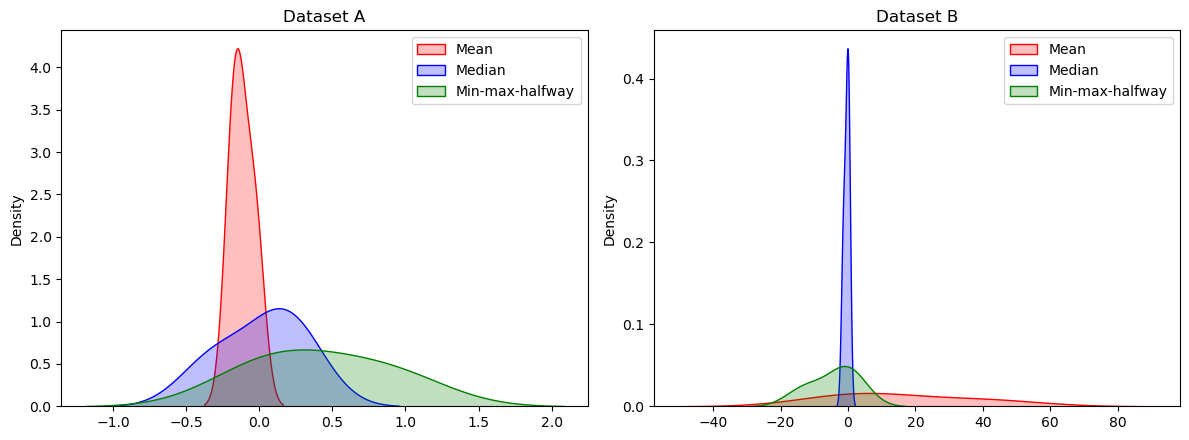

In [25]:
def P3_visualizing(data):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4.5))
    colors = ['r', 'b', 'g']
    labels = ['Mean', 'Median', 'Min-max-halfway']
    titles = ['Dataset A','Dataset B']
    for i in range(0, 2):
        for j in range(0, 3):
            sns.kdeplot(data[i][j], fill=True, color=colors[j], ax=ax[i], label=labels[j])
        ax[i].legend()
        ax[i].set_title(titles[i])
    fig.tight_layout()
    plt.show()
result = observe_data(20, 50)
P3_visualizing(result)

In [35]:
M = ['mean', 'median', 'min-max-halfway']
D = ['Dataset A', 'Dataset B']
for i in range(len(D)):
    print(D[i])
    for j in range(len(M)):
        print(f"Standard deviation of {M[j]}: {round(np.sqrt(np.sum(np.square(result[i][j] - np.mean(result[i][j])))/50), 4)}")

Dataset A
Standard deviation of mean: 0.0159
Standard deviation of median: 0.0584
Standard deviation of min-max-halfway: 0.0961
Dataset B
Standard deviation of mean: 4.2527
Standard deviation of median: 0.1584
Standard deviation of min-max-halfway: 1.421


## Chapter 5:
### Problem 5.9

In [2]:
B = [0.01, 0.1, 1]

In [3]:
def init_matrix(B):
    M = np.empty((20, 20), dtype = 'float')
    for i in range(0, 20):
        for j in range(0,20):
            M[i, j] = np.exp(-1*B*abs(i-j))
    return M

In [7]:
def get_stack_eigval(M):
    eigvals = np.linalg.eigvals(M)
    eigvals[::-1].sort()
    v = np.empty(20, dtype = 'float')
    v[0] = eigvals[0]
    for i in range(1, 20):
        v[i] = v[i-1]+eigvals[i]
    return v

In [8]:
def P5_visualizing(B):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5))
    for i, b in enumerate(B):
        Matrix = init_matrix(b)
        V = get_stack_eigval(Matrix)
        ax[i].plot(range(1, 21), V)
        ax[i].set_title(f"B = {b}")
        ax[i].set_ylabel('variance')
        ax[i].set_xlabel('number of features')
    fig.tight_layout()
    fig.suptitle("Variance according to Number of featues and B", va='bottom')
    plt.show()

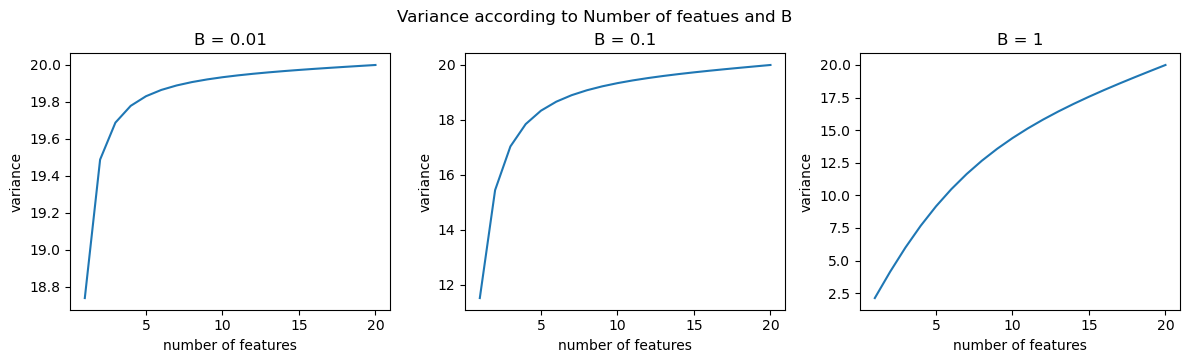

In [9]:
P5_visualizing(B)

## Chương 7:
### Problem 7.13

In [3]:
def E(N, decay):
    U = np.random.uniform(0, 1, N)
    E_ = [-1.*np.log(u)/decay for u in U]
    return E_

def H(N, exponent):
    U = np.random.uniform(0, 1, N)
    m = -1./(exponent-1)
    return np.power(U, m, dtype='float')

N = 20000
D = [E(N, 1), E(N, 2), H(N, 2), E(N, 3), np.random.normal(1, 1, N)]


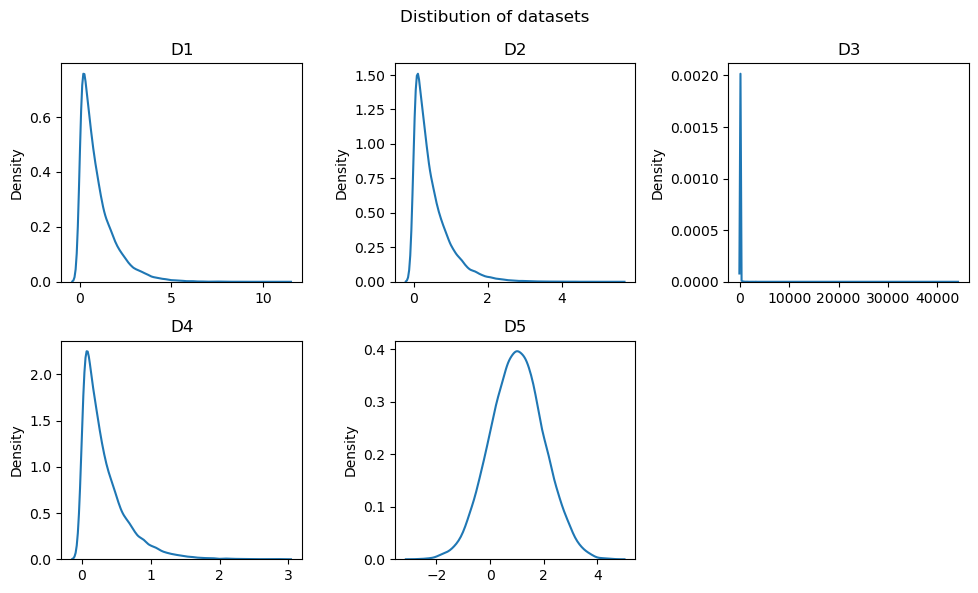

In [80]:
def P7_distribution(D):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
    for i, d in enumerate(D):
        sns.kdeplot(d, ax=ax[int(i/3), i%3])
        # ax[int(i/3), i%3].hist(d)
        ax[int(i/3), i%3].set_title(f"D{i+1}")
    fig.suptitle("Distibution of datasets")
    fig.tight_layout()
    ax[1, 2].set_visible(False)
    plt.show()
    
P7_distribution(D)

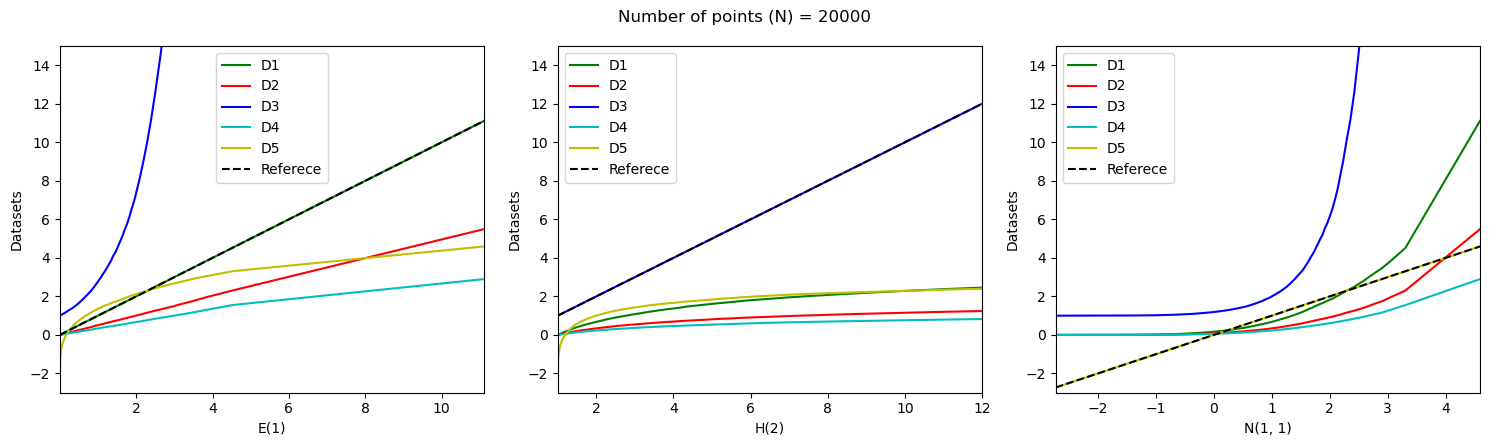

In [75]:
def P7_QQplot(D, hypothesis, N):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4.5))
    colors = ['g', 'r', 'b', 'c', 'y']
    labels = ['E(1)', 'H(2)', 'N(1, 1)']
    i = 0
    for dist in hypothesis:
        h_quantitles = np.percentile(dist, np.arange(0, 101, 1))
        left = np.min(h_quantitles)
        right = np.max(h_quantitles)
        for j, d in enumerate(D):
            d_quantitles = np.percentile(d, np.arange(0, 101, 1))
            ax[i].plot(h_quantitles, d_quantitles, color=colors[j], label=f"D{j+1}")
        
        ax[i].plot([left, right], [left, right], linestyle='--', color='black', label = "Referece")
        if right > 12:
            right = 12
        ax[i].set_ylim(-3, 15)
        ax[i].set_xlim(left, right)
        ax[i].legend()
        ax[i].set_xlabel(labels[i])
        ax[i].set_ylabel('Datasets')
        i += 1
    fig.suptitle(f"Number of points (N) = {N}")
    fig.tight_layout()
    
P7_QQplot(D, [D[0], D[2], D[4]], 20000)

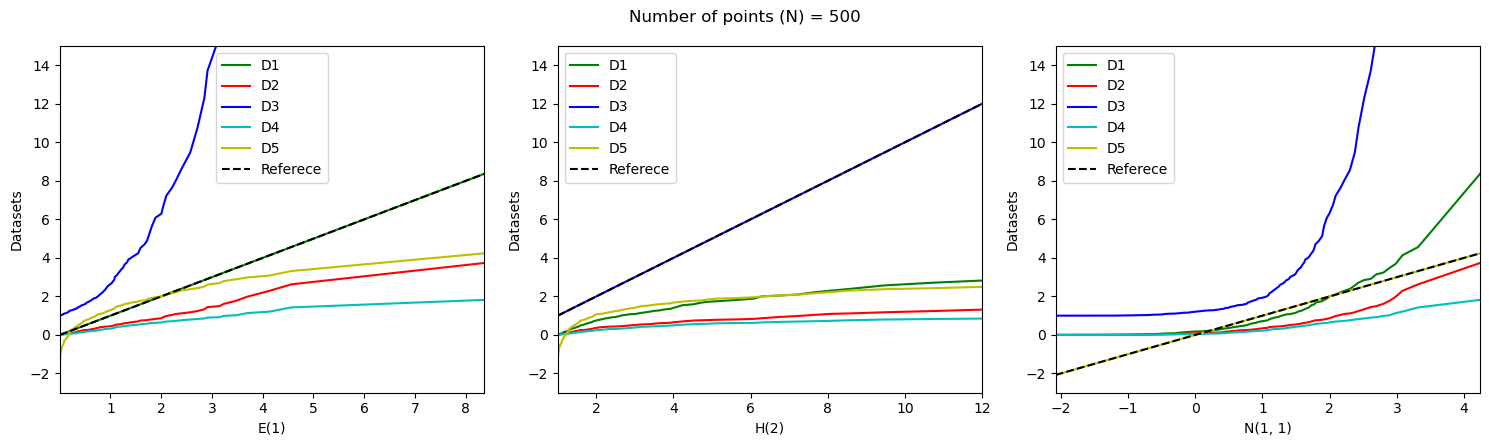

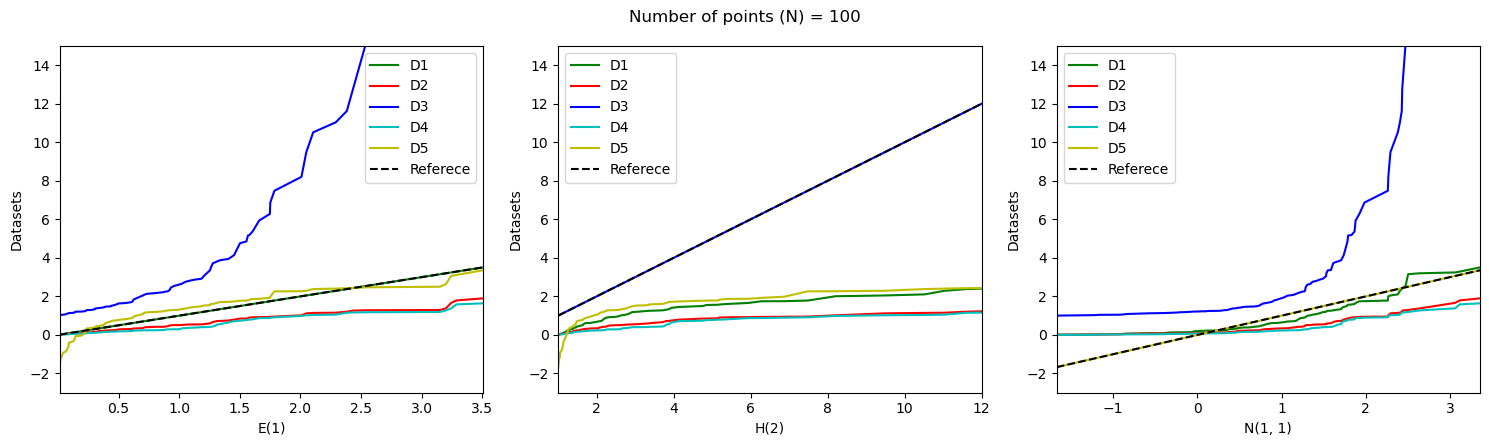

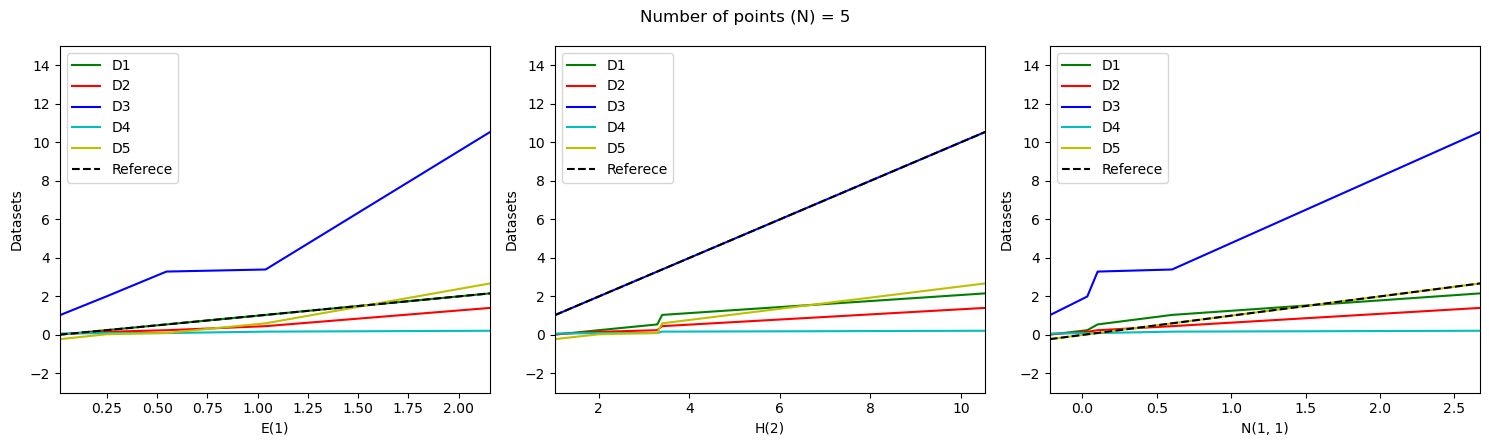

In [87]:
def try_different_N():
    i = 0
    N = [500, 100, 5]
    for n in N:
        Data = [E(n, 1), E(n, 2), H(n, 2), E(n, 3), np.random.normal(1, 1, n)]
        P7_QQplot(Data, [Data[0], Data[2], Data[4]], n)
        i += 1
        n = int(n/10)
    plt.show()
try_different_N()

## Chương 9:
### Problem 9.6

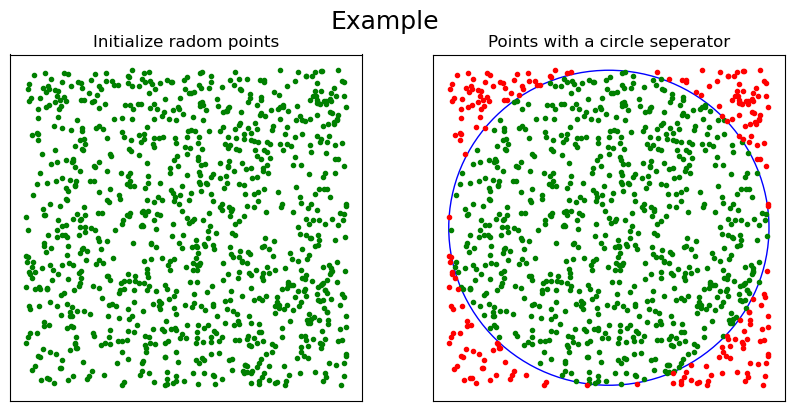

In [2]:
def Visualizing():
    p = np.random.uniform(-1, 1, (1000, 2))
    _in = p[p[:, 0]*p[:, 0] + p[:, 1]*p[:, 1] <= 1]
    _out = p[p[:, 0]*p[:, 0] + p[:, 1]*p[:, 1] > 1]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))
    for x, y in p:
        ax[0].plot(x, y, color='green', marker='.')
    for x, y in _in:
        ax[1].plot(x, y, color='green', marker='.')
    for x, y in _out:
        ax[1].plot(x, y, color='red', marker='.')
        
    circle = patches.Circle((0, 0), radius=1, color='blue', fill=False)
    ax[1].add_patch(circle)
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
    ax[0].set_title("Initialize radom points")
    ax[1].set_title("Points with a circle seperator")
    
    fig.suptitle('Example', fontsize=18)
    plt.show();

Visualizing()

In [9]:
def find_pi():
    data = np.empty((999,3),dtype='float')
    i = 0
    for N in range(100, 100000, 100):
        points = np.random.uniform(-1, 1, (N, 2))
        inside = points[points[:, 0]*points[:, 0] + points[:, 1]*points[:, 1] <= 1]
        data[i][0] = N
        data[i][1] = abs(np.pi - 4.0*len(inside)/len(points))
        data[i][2] = 4.0*len(inside)/len(points)
        i = i + 1
    return data
data = find_pi()

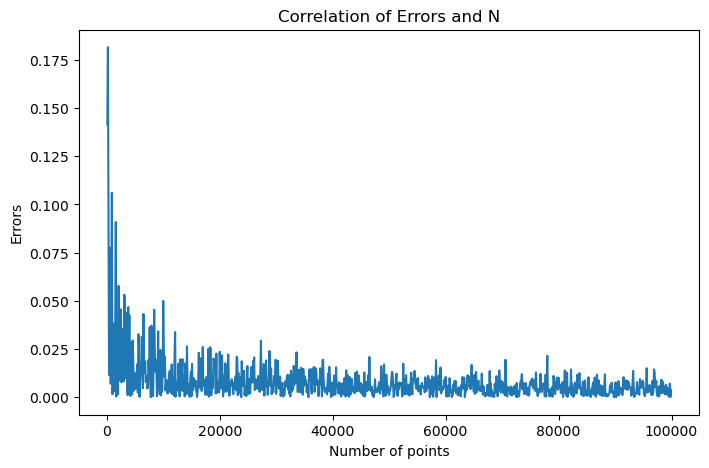

In [10]:
def analyse_result(results):
    plt.figure(figsize=(8, 5))
    plt.plot(results[:,0], results[:, 1])
    plt.ylabel("Errors")
    plt.xlabel("Number of points")
    plt.title("Correlation of Errors and N")
    plt.show()
analyse_result(data)

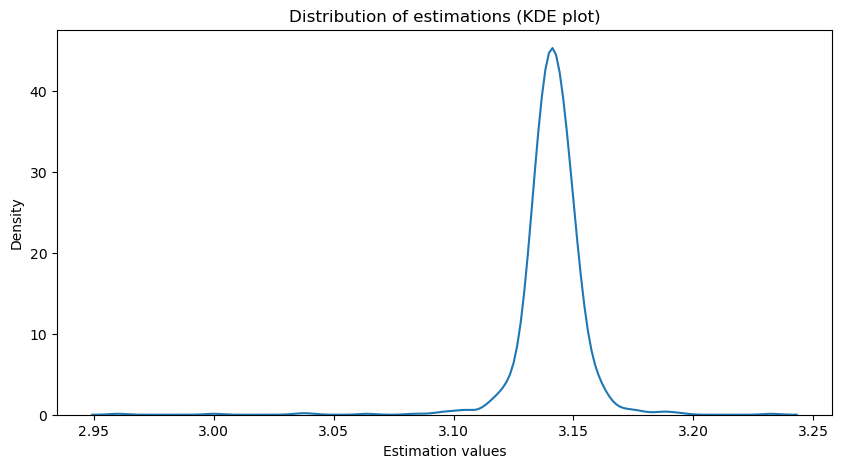

In [22]:
def data_distribution(data):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data)
    plt.xlabel('Estimation values')
    plt.ylabel('Density')
    plt.title('Distribution of estimations (KDE plot)')
    plt.show()
data_distribution(data[:,2])

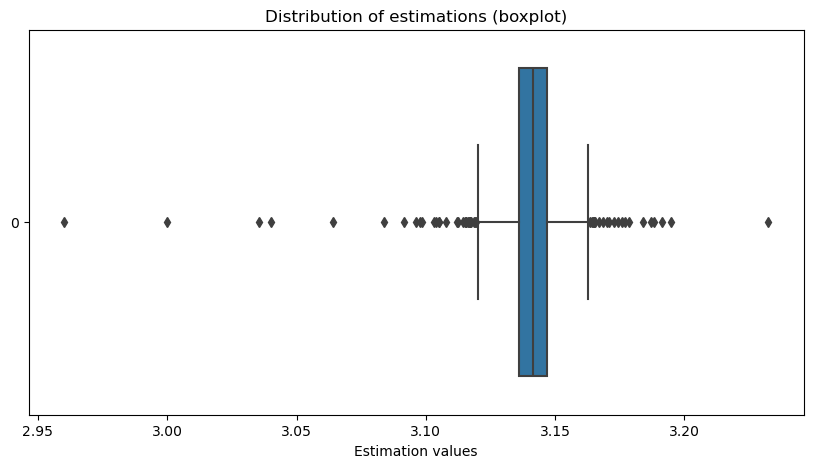

In [23]:
def distribute_with_boxplot(data):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data, orient='h')
    plt.xlabel('Estimation values')
    plt.title('Distribution of estimations (boxplot)')
    plt.show()
distribute_with_boxplot(data[:,2])

In [14]:
print("Mean of data = ", np.mean(data[:, 2]))
print("Standard Deviation = ", np.sqrt(np.sum(np.square(data[:, 2] - np.mean(data[:, 2])))/998))

Mean of data =  3.1409706524780154
Standard Deviation =  0.014044988719259802
